# Fuel Consumption Project
The main purpose of this project is to develop a regression model which calculates how much fuel the airplane consumes per unit time, using the appropriate attributes.

In [213]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score

## DataSet 1

DataSet1_Q includes samples taken from an airplane.

In [214]:
dt1 = pd.read_pickle("DataSet1_Q") # The dataset1, a file with pickle formatting, load to dt1 DataFrame.
dt1.head()

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
0,0.0,0.0,0.00,0.0,0.0000,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,139.0,263.0,130.13,121.0,0.1995,20.50,337140.125583,238.0,37264.0,36208.0,...,107100.0,1006.0,4.0,0.0,0.0,68.515987,1.874518,0.000000,492526.970794,1.124502e+06
2,139.0,263.0,132.88,125.0,0.2050,20.38,337130.850423,238.0,37184.0,36192.0,...,107050.0,1006.0,4.0,0.5,0.0,70.390504,2.139048,0.002165,468451.878186,1.196749e+06
3,140.0,263.0,137.13,129.0,0.2120,20.38,337121.585343,238.0,37168.0,36128.0,...,107000.0,1006.0,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.461999,1.226738e+06
4,140.0,263.0,143.00,133.0,0.2185,20.25,337112.316232,238.0,37184.0,36144.0,...,106950.0,1006.0,4.0,0.0,0.0,75.009352,1.794219,0.000000,419061.141494,1.023915e+06


## Exploratory Data Analysis For Dataset1

In [215]:
dt1.keys() # Let's see what the dt1 dataset's features (column) are.

Index(['Altitude (ft)', 'Heading (deg)', 'CAS (kt)', 'Ground Speed (kt)',
       'Mach', 'Temp (C)', 'Mass (kg)', 'Apu Fuel (lb/hr)', 'FF1 (lb/hr)',
       'FF2 (lb/hr)', 'Throttle 1', 'Throttle 2', 'Course (deg)',
       'Wind Direction (deg)', 'Wind Speed (kt)', 'Flap (deg)', 'Landing Gear',
       'Speed Break', 'Zero Fuel Weight (lbs)', 'Fuel Onboard (kg)',
       'Air Pressure (mb)', 'Ground Speed Dot (kt/s2)', 'Altitude Dot (ft/s)',
       'Heading Dot (deg/s)', 'True Airspeed (m/s)',
       'True Airspeed Dot (m/s2)', 'Gamma (rad)', 'Drag (N)', 'Thrust (N)'],
      dtype='object')

In [216]:
dt1.isnull().any() # Let's see if there are any missing values ​​in the dt1 dataset.

Altitude (ft)               False
Heading (deg)               False
CAS (kt)                    False
Ground Speed (kt)           False
Mach                        False
Temp (C)                    False
Mass (kg)                   False
Apu Fuel (lb/hr)            False
FF1 (lb/hr)                 False
FF2 (lb/hr)                 False
Throttle 1                  False
Throttle 2                  False
Course (deg)                False
Wind Direction (deg)        False
Wind Speed (kt)             False
Flap (deg)                  False
Landing Gear                False
Speed Break                 False
Zero Fuel Weight (lbs)      False
Fuel Onboard (kg)           False
Air Pressure (mb)           False
Ground Speed Dot (kt/s2)    False
Altitude Dot (ft/s)         False
Heading Dot (deg/s)         False
True Airspeed (m/s)         False
True Airspeed Dot (m/s2)    False
Gamma (rad)                 False
Drag (N)                    False
Thrust (N)                  False
dtype: bool

There are not any missing values in our dt1 dataset.

Let's calculate the total fuel consumption of the aircraft and add it to the dt1 dataset as a new feature, *"Total Fuel Consumption (lb/hr)"*.

In [217]:
dt1["Total Fuel Consumption (lb/hr)"] = dt1["FF1 (lb/hr)"] + dt1["FF2 (lb/hr)"] # total fuel consumption
dt1.head()

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
0,0.0,0.0,0.00,0.0,0.0000,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
1,139.0,263.0,130.13,121.0,0.1995,20.50,337140.125583,238.0,37264.0,36208.0,...,1006.0,4.0,0.0,0.0,68.515987,1.874518,0.000000,492526.970794,1.124502e+06,73472.0
2,139.0,263.0,132.88,125.0,0.2050,20.38,337130.850423,238.0,37184.0,36192.0,...,1006.0,4.0,0.5,0.0,70.390504,2.139048,0.002165,468451.878186,1.196749e+06,73376.0
3,140.0,263.0,137.13,129.0,0.2120,20.38,337121.585343,238.0,37168.0,36128.0,...,1006.0,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.461999,1.226738e+06,73296.0
4,140.0,263.0,143.00,133.0,0.2185,20.25,337112.316232,238.0,37184.0,36144.0,...,1006.0,4.0,0.0,0.0,75.009352,1.794219,0.000000,419061.141494,1.023915e+06,73328.0


In [218]:
dt1.dtypes # Look at the types of dt1 dataset's features.

Altitude (ft)                     float64
Heading (deg)                     float64
CAS (kt)                          float64
Ground Speed (kt)                 float64
Mach                              float64
Temp (C)                          float64
Mass (kg)                         float64
Apu Fuel (lb/hr)                  float64
FF1 (lb/hr)                       float64
FF2 (lb/hr)                       float64
Throttle 1                        float64
Throttle 2                        float64
Course (deg)                      float64
Wind Direction (deg)              float64
Wind Speed (kt)                   float64
Flap (deg)                        float64
Landing Gear                      float64
Speed Break                       float64
Zero Fuel Weight (lbs)            float64
Fuel Onboard (kg)                 float64
Air Pressure (mb)                 float64
Ground Speed Dot (kt/s2)          float64
Altitude Dot (ft/s)               float64
Heading Dot (deg/s)               

The type of all features is float64. Change the type to float32 because float64's take up twice as much memory - and doing operations on them may be a lot slower in some machine architectures.

In [219]:
dt1 = dt1.astype("float32")
dt1.head()

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.0
1,139.0,263.0,130.130005,121.0,0.1995,20.500000,337140.12500,238.0,37264.0,36208.0,...,1006.0,4.0,0.0,0.0,68.515984,1.874518,0.000000,492526.96875,1.124502e+06,73472.0
2,139.0,263.0,132.880005,125.0,0.2050,20.379999,337130.84375,238.0,37184.0,36192.0,...,1006.0,4.0,0.5,0.0,70.390503,2.139048,0.002165,468451.87500,1.196749e+06,73376.0
3,140.0,263.0,137.130005,129.0,0.2120,20.379999,337121.59375,238.0,37168.0,36128.0,...,1006.0,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.46875,1.226738e+06,73296.0
4,140.0,263.0,143.000000,133.0,0.2185,20.250000,337112.31250,238.0,37184.0,36144.0,...,1006.0,4.0,0.0,0.0,75.009354,1.794219,0.000000,419061.15625,1.023915e+06,73328.0


In [220]:
dt1.dtypes # Check the types of features.

Altitude (ft)                     float32
Heading (deg)                     float32
CAS (kt)                          float32
Ground Speed (kt)                 float32
Mach                              float32
Temp (C)                          float32
Mass (kg)                         float32
Apu Fuel (lb/hr)                  float32
FF1 (lb/hr)                       float32
FF2 (lb/hr)                       float32
Throttle 1                        float32
Throttle 2                        float32
Course (deg)                      float32
Wind Direction (deg)              float32
Wind Speed (kt)                   float32
Flap (deg)                        float32
Landing Gear                      float32
Speed Break                       float32
Zero Fuel Weight (lbs)            float32
Fuel Onboard (kg)                 float32
Air Pressure (mb)                 float32
Ground Speed Dot (kt/s2)          float32
Altitude Dot (ft/s)               float32
Heading Dot (deg/s)               

Now, let's find correlation with a specific parameter, *"Total Fuel Consumption (lb/hr)"* feature.

Choose parameters with highest correlation by looking at the pandas.Series.

In [221]:
dt1.corrwith(dt1["Total Fuel Consumption (lb/hr)"]).sort_values(ascending=False)

Total Fuel Consumption (lb/hr)    1.000000
FF1 (lb/hr)                       0.999890
FF2 (lb/hr)                       0.999887
Throttle 2                        0.814228
Altitude Dot (ft/s)               0.812635
Throttle 1                        0.811578
Gamma (rad)                       0.805999
Thrust (N)                        0.738130
Fuel Onboard (kg)                 0.612196
Mass (kg)                         0.601203
Drag (N)                          0.420624
Ground Speed Dot (kt/s2)          0.403419
CAS (kt)                          0.312377
True Airspeed Dot (m/s2)          0.239941
Air Pressure (mb)                 0.211549
Temp (C)                          0.184191
Course (deg)                      0.139621
Apu Fuel (lb/hr)                  0.132708
Zero Fuel Weight (lbs)            0.114765
Heading (deg)                     0.113928
Flap (deg)                        0.042316
Landing Gear                      0.012822
True Airspeed (m/s)              -0.001220
Heading Dot

or create a heat map and able to see the correlation of all parameters with each other.

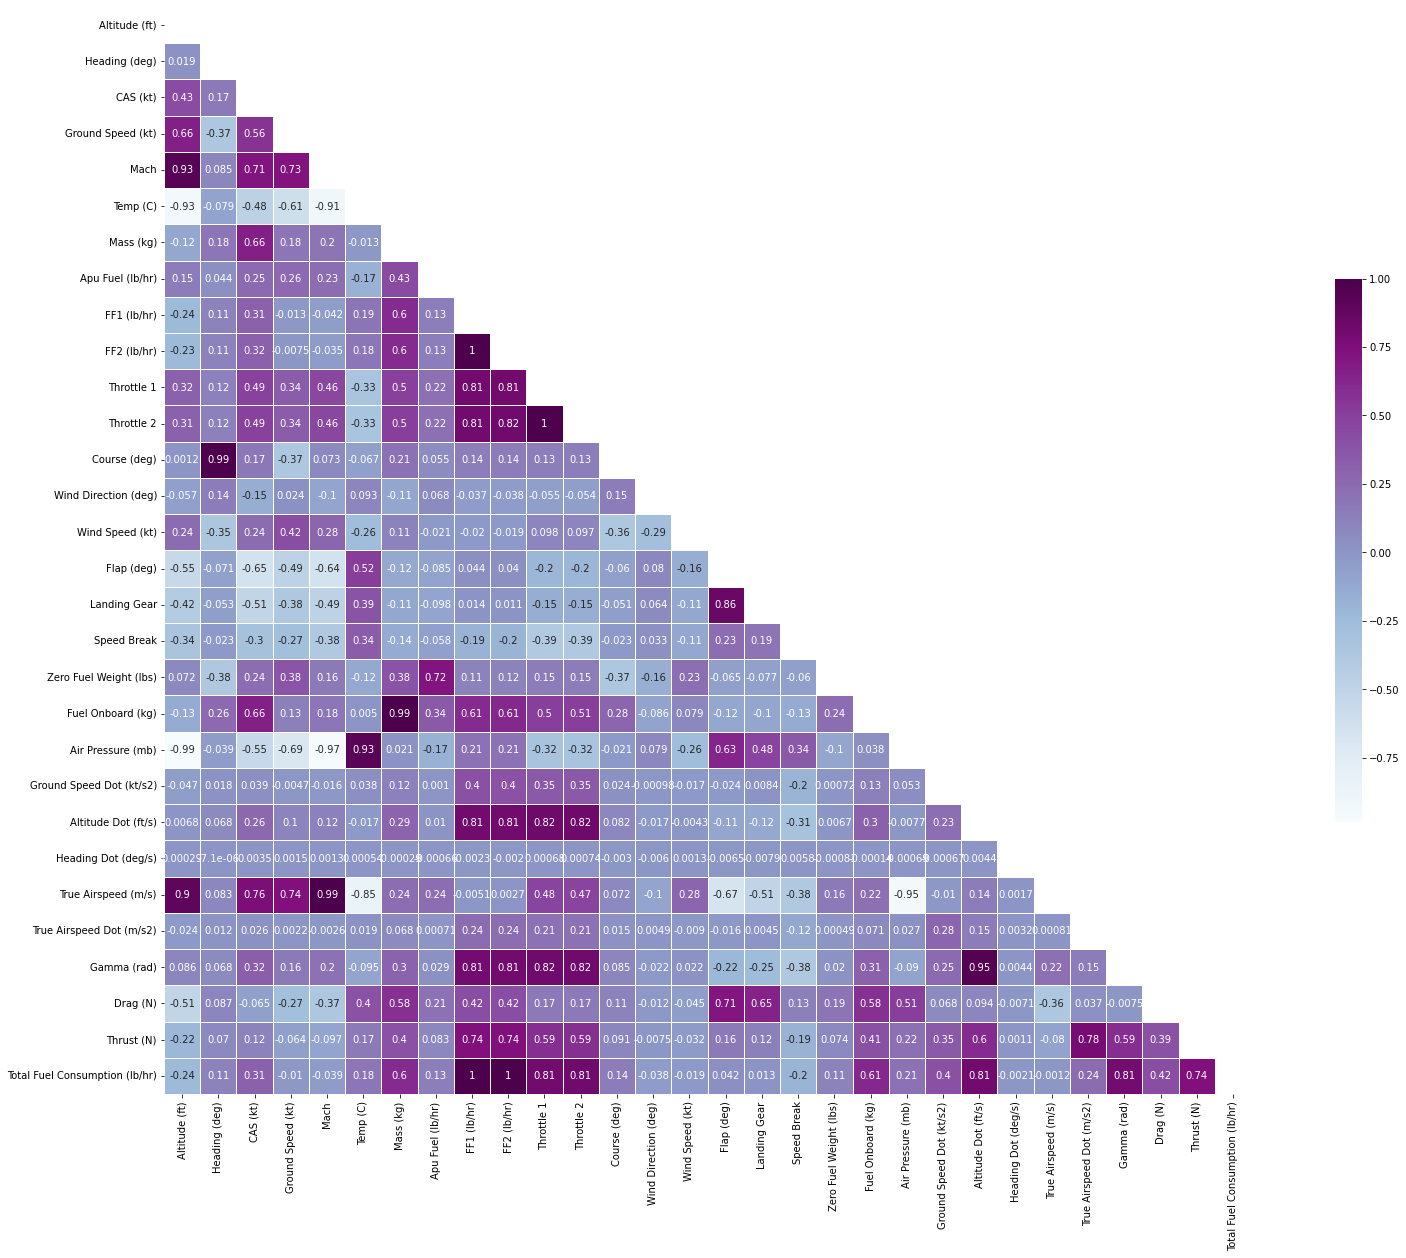

In [222]:
# Calculate correlation matrix
corr = dt1.corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Create Heatmap
sns.heatmap(corr, mask=mask, cmap="BuPu", vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True);

or create a bar graph and able to see the correlation between *"Total Fuel Consumption (lb/hr)"* and other features except three features: itself, *"FF1 (lb/hr)"* and *"FF1 (lb/hr)"*.

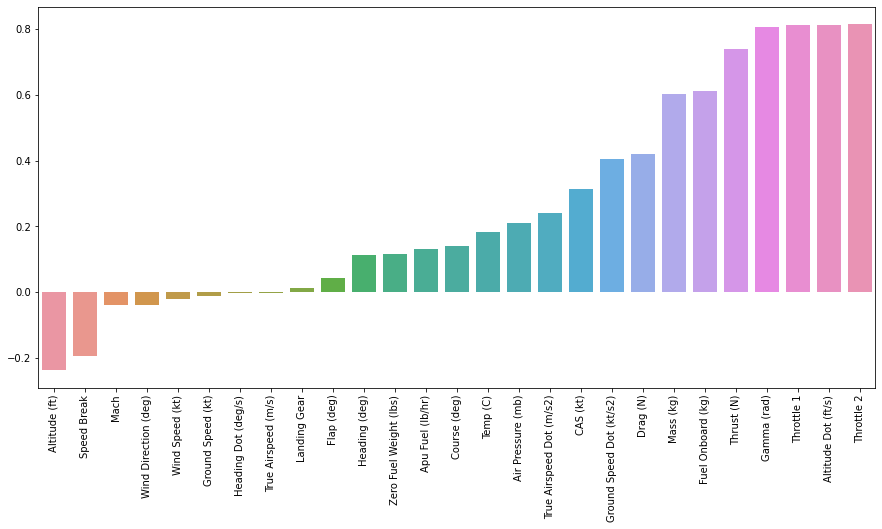

In [223]:
dt1_fuel = dt1.corrwith(dt1["Total Fuel Consumption (lb/hr)"]).drop(["Total Fuel Consumption (lb/hr)", "FF1 (lb/hr)", "FF2 (lb/hr)"]).sort_values()
plt.figure(figsize=(15, 7))

g = sns.barplot(x=dt1_fuel.index, y=dt1_fuel.values)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

Choose 6 features that have more correlation with the specific parameter. (> 0.5 correlation value)
These features are: "Mass (kg)", "Fuel Onboard (kg)", "Thrust (N)", "Gamma (rad)", "Throttle 1", "Altitude Dot (ft/s)", "Throttle 2"

In [224]:
fts1 = ["Mass (kg)", "Fuel Onboard (kg)", "Thrust (N)", "Gamma (rad)", "Throttle 1", "Altitude Dot (ft/s)", "Throttle 2"]

## DataSet 2

DataSet2_Q includes samples taken from 10 different airplanes.

In [225]:
dt2 = pd.read_pickle("DataSet2_Q") # The dataset2, a file with pickle formatting, load to dt2 DataFrame.
dt2.head()

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Fuel Onboard (kg),Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N)
0,0.0,0.0,0.00,0.0,0.0000,0.00,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000e+00
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,109700.0,1008.0,3.0,0.0,0.0,69.279215,2.551095,0.0,485283.286925,1.315804e+06
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,109700.0,1008.0,3.5,0.0,0.0,71.830310,2.301695,0.0,460186.379745,1.209495e+06
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,109700.0,1008.0,4.0,0.0,0.0,73.882604,1.033760,0.0,442943.004492,7.794714e+05
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,109675.0,1008.0,3.5,0.0,0.0,73.897830,1.539221,0.0,442924.664781,9.439875e+05


## Exploratory Data Analysis For Dataset2

In [226]:
dt2.keys() # Let's see what the dt2 dataset's features (column) are.

Index(['Altitude (ft)', 'Heading (deg)', 'CAS (kt)', 'Ground Speed (kt)',
       'Mach', 'Temp (C)', 'Mass (kg)', 'Apu Fuel (lb/hr)', 'FF1 (lb/hr)',
       'FF2 (lb/hr)', 'Throttle 1', 'Throttle 2', 'Course (deg)',
       'Wind Direction (deg)', 'Wind Speed (kt)', 'Flap (deg)', 'Landing Gear',
       'Speed Break', 'Zero Fuel Weight (lbs)', 'Fuel Onboard (kg)',
       'Air Pressure (mb)', 'Ground Speed Dot (kt/s2)', 'Altitude Dot (ft/s)',
       'Heading Dot (deg/s)', 'True Airspeed (m/s)',
       'True Airspeed Dot (m/s2)', 'Gamma (rad)', 'Drag (N)', 'Thrust (N)'],
      dtype='object')

In [227]:
dt2.isnull().any() # Let's see if there are any missing values ​​in the dt2 dataset.

Altitude (ft)               False
Heading (deg)               False
CAS (kt)                    False
Ground Speed (kt)           False
Mach                        False
Temp (C)                    False
Mass (kg)                   False
Apu Fuel (lb/hr)            False
FF1 (lb/hr)                 False
FF2 (lb/hr)                 False
Throttle 1                  False
Throttle 2                  False
Course (deg)                False
Wind Direction (deg)        False
Wind Speed (kt)             False
Flap (deg)                  False
Landing Gear                False
Speed Break                 False
Zero Fuel Weight (lbs)      False
Fuel Onboard (kg)           False
Air Pressure (mb)           False
Ground Speed Dot (kt/s2)    False
Altitude Dot (ft/s)         False
Heading Dot (deg/s)         False
True Airspeed (m/s)         False
True Airspeed Dot (m/s2)    False
Gamma (rad)                 False
Drag (N)                    False
Thrust (N)                  False
dtype: bool

There are not any missing values in our dt2 dataset.

Let's calculate the total fuel consumption of these aircrafts and add it to the dt2 dataset as a new feature, *"Total Fuel Consumption (lb/hr)"*.

In [228]:
dt2["Total Fuel Consumption (lb/hr)"] = dt2["FF1 (lb/hr)"] + dt2["FF2 (lb/hr)"] # total fuel consumption
dt2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
0,0.0,0.0,0.00,0.0,0.0000,0.00,0.000000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
1,140.0,263.0,131.63,125.0,0.2025,18.25,325554.611609,238.0,31984.0,32544.0,...,1008.00,3.0,0.0,0.0,69.279215,2.551095,0.000000,485283.286925,1.315804e+06,64528.0
2,140.0,263.0,136.63,128.0,0.2100,18.13,325546.449257,238.0,31968.0,32576.0,...,1008.00,3.5,0.0,0.0,71.830310,2.301695,0.000000,460186.379745,1.209495e+06,64544.0
3,140.0,263.0,140.88,132.0,0.2160,18.13,325538.294968,238.0,31952.0,32528.0,...,1008.00,4.0,0.0,0.0,73.882604,1.033760,0.000000,442943.004492,7.794714e+05,64480.0
4,140.0,263.0,142.38,136.0,0.2160,18.25,325530.138664,238.0,31984.0,32512.0,...,1008.00,3.5,0.0,0.0,73.897830,1.539221,0.000000,442924.664781,9.439875e+05,64496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375374,2454.0,74.0,135.38,150.0,0.2130,22.50,208627.567788,241.0,5584.0,5312.0,...,929.75,-1.0,-5.5,0.0,73.401225,-0.516910,-0.022839,302981.771326,1.484132e+05,10896.0
375375,2449.0,74.0,134.25,148.0,0.2120,22.50,208626.269387,241.0,5152.0,4912.0,...,930.00,-1.5,-5.0,0.0,73.056619,-0.415419,-0.020861,302395.167373,1.730488e+05,10064.0
375376,2444.0,74.0,134.00,147.0,0.2105,22.75,208625.057671,241.0,4800.0,4576.0,...,930.00,-1.5,-3.5,0.0,72.570387,-0.674056,-0.014700,301608.387444,1.309080e+05,9376.0
375377,2442.0,74.0,132.75,145.0,0.2080,22.75,208623.942722,241.0,4352.0,4256.0,...,930.00,-2.5,-1.0,0.0,71.708506,-1.236298,-0.004251,300558.211231,3.394060e+04,8608.0


In [229]:
dt2.dtypes # Look at the types of dt2 dataset's features.

Altitude (ft)                     float64
Heading (deg)                     float64
CAS (kt)                          float64
Ground Speed (kt)                 float64
Mach                              float64
Temp (C)                          float64
Mass (kg)                         float64
Apu Fuel (lb/hr)                  float64
FF1 (lb/hr)                       float64
FF2 (lb/hr)                       float64
Throttle 1                        float64
Throttle 2                        float64
Course (deg)                      float64
Wind Direction (deg)              float64
Wind Speed (kt)                   float64
Flap (deg)                        float64
Landing Gear                      float64
Speed Break                       float64
Zero Fuel Weight (lbs)            float64
Fuel Onboard (kg)                 float64
Air Pressure (mb)                 float64
Ground Speed Dot (kt/s2)          float64
Altitude Dot (ft/s)               float64
Heading Dot (deg/s)               

The type of all features is float64. Change the type to float32 because float64's take up twice as much memory - and doing operations on them may be a lot slower in some machine architectures.

In [230]:
dt2 = dt2.astype("float32")
dt2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.0
1,140.0,263.0,131.630005,125.0,0.2025,18.250000,325554.625000,238.0,31984.0,32544.0,...,1008.00,3.0,0.0,0.0,69.279213,2.551095,0.000000,485283.28125,1.315804e+06,64528.0
2,140.0,263.0,136.630005,128.0,0.2100,18.129999,325546.437500,238.0,31968.0,32576.0,...,1008.00,3.5,0.0,0.0,71.830307,2.301695,0.000000,460186.37500,1.209495e+06,64544.0
3,140.0,263.0,140.880005,132.0,0.2160,18.129999,325538.281250,238.0,31952.0,32528.0,...,1008.00,4.0,0.0,0.0,73.882607,1.033760,0.000000,442943.00000,7.794714e+05,64480.0
4,140.0,263.0,142.380005,136.0,0.2160,18.250000,325530.125000,238.0,31984.0,32512.0,...,1008.00,3.5,0.0,0.0,73.897827,1.539221,0.000000,442924.65625,9.439874e+05,64496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375374,2454.0,74.0,135.380005,150.0,0.2130,22.500000,208627.562500,241.0,5584.0,5312.0,...,929.75,-1.0,-5.5,0.0,73.401222,-0.516910,-0.022839,302981.78125,1.484132e+05,10896.0
375375,2449.0,74.0,134.250000,148.0,0.2120,22.500000,208626.265625,241.0,5152.0,4912.0,...,930.00,-1.5,-5.0,0.0,73.056618,-0.415419,-0.020861,302395.15625,1.730488e+05,10064.0
375376,2444.0,74.0,134.000000,147.0,0.2105,22.750000,208625.062500,241.0,4800.0,4576.0,...,930.00,-1.5,-3.5,0.0,72.570389,-0.674056,-0.014700,301608.37500,1.309080e+05,9376.0
375377,2442.0,74.0,132.750000,145.0,0.2080,22.750000,208623.937500,241.0,4352.0,4256.0,...,930.00,-2.5,-1.0,0.0,71.708504,-1.236298,-0.004251,300558.21875,3.394060e+04,8608.0


In [231]:
dt2.dtypes # Check the types of features.

Altitude (ft)                     float32
Heading (deg)                     float32
CAS (kt)                          float32
Ground Speed (kt)                 float32
Mach                              float32
Temp (C)                          float32
Mass (kg)                         float32
Apu Fuel (lb/hr)                  float32
FF1 (lb/hr)                       float32
FF2 (lb/hr)                       float32
Throttle 1                        float32
Throttle 2                        float32
Course (deg)                      float32
Wind Direction (deg)              float32
Wind Speed (kt)                   float32
Flap (deg)                        float32
Landing Gear                      float32
Speed Break                       float32
Zero Fuel Weight (lbs)            float32
Fuel Onboard (kg)                 float32
Air Pressure (mb)                 float32
Ground Speed Dot (kt/s2)          float32
Altitude Dot (ft/s)               float32
Heading Dot (deg/s)               

## 1. Build a Model and Make Prediction

Let's build Fuel Consumption model using Random Forest.

dt1 dataset is used for training and validation set.

dt2 dataset is used for test set.

**Random Forest Regression** is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model. [[1]](https://levelup.gitconnected.com/random-forest-regression-209c0f354c84)

![Random Forest Algorithm](https://miro.medium.com/max/1400/1*ZFuMI_HrI3jt2Wlay73IUQ.png) 

The process of fitting no decision trees on different subsample and then taking out the average to increase the performance of the model is called *“Random Forest”.* Suppose we have to go on a vacation to someplace. Before going to the destination we vote for the place where we want to go. Once we have voted for the destination then we choose hotels, etc. And then come back with the final choice of hotel as well. The whole process of getting the vote for the place to the hotel is nothing but a Random Forest Algorithm. This is the way the algorithm works and the reason it is preferred over all other algorithms because of its ability to give high accuracy and to prevent overfitting by making use of more trees. [[2]](https://analyticsindiamag.com/random-forest-vs-xgboost-comparing-tree-based-algorithms-with-codes/)

**R-squared** is a measurement of how well the model fits the data. The closer the R-squared value is to 1, the better predictions

**Mean squared error (MSE)** measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. The MSE is a measure of the quality of an estimator.

**Mean absolute error (MAE)** is a model evaluation metric used with regression models. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance.

One difference between MSE and MAE is that MSE will tend to punish large errors more because it squares all the errors. Thus, if it is particularly undesirable to have large errors in a specific task, it might be worth considering to use MSE instead of MAE. [[3]](https://peltarion.com/knowledge-center/evaluation-view/regression-loss-metrics/mse-/-mean-squared-error)

In [232]:
# Fuel Consumption model with features in fts1 variable using Random Forest

# X-y
X = dt1[fts1]
y = dt1["Total Fuel Consumption (lb/hr)"] # target variable

# Train-valid-test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_test, y_test = dt2[fts1], dt2["Total Fuel Consumption (lb/hr)"]

# Built Model by using Random Forest
rf_dt = RandomForestRegressor(n_estimators=30, max_depth=10, max_features=.3, max_samples=.7, random_state=42)

# Fit
rf_dt.fit(X=X_train, y=y_train)

# Test
y_pred = rf_dt.predict(X=X_test)

# Errors
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 586.6729427017498
Mean Squared Error: 1119129.3407960986
R2 Score: 0.9634360364170743


It is seen that the model built with Random Forest Algorithm works with 96% R2 score.
The difference between the predicted value and the actual value is 586.67 according to MAE.

## 2. Separate Model Training For One Flight Phase: Climb, Cruise, Descent

In the second section, three different models are trained for each flight phase: climb, cruise (fixed altitude) and descent.

In [233]:
# Climb, descent and cruise conditions can be calculated from given dataset with the following conditions. 
def situation(condition, data):
    """
    Description
    ------------ 
    Climb, descent and cruise conditions can be calculated with the following conditions.

    Arguments
    ------------
    condition: (str) climb, descent, cruise
    data: (DataFrame) dataset

    """
    
    if condition == "climb":
        return data [np.gradient(data["Altitude (ft)"].values) > 3]
    elif condition == "descent":
        return data[np.gradient(data["Altitude (ft)"].values) < -3]
    else:
        return data[np.abs(np.gradient(data["Altitude (ft)"].values)) < 1]


In [234]:
# Function for finding correlation with a specific parameter, "Total Fuel Consumption (lb/hr)" feature.
def find_corr(data):
    """ 
    Description
    ------------ 
    Find correlation with a specific parameter

    Arguments
    ------------
    data: (DataFrame) dataset
   
    """
    
    data_corr = data.corrwith(data["Total Fuel Consumption (lb/hr)"]).sort_values(ascending=False)
    print(data_corr)

# Function for creating a heat map and able to see the correlation of all parameters with each other.
def find_hmap(data):
    """ 
    Description
    ------------ 
    Create a heat map

    Arguments
    ------------
    data: (DataFrame) dataset    
    
    """    
    
    # Calculate correlation matrix
    corr = data.corr()
    # Mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Matplotlib figure
    f, ax = plt.subplots(figsize=(30, 20))
    # Heatmap
    sns.heatmap(corr, mask=mask, cmap="BuPu", vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5}, annot=True);

# Function for creating a bar graph for visualizing correlation 
def visual_corr(data):
    """ 
    Description
    ------------     
    Create a bar graph for visualizing correlation

    Arguments
    ------------
    data: (DataFrame) dataset   

    """
    
    fuel = data.corrwith(dt1["Total Fuel Consumption (lb/hr)"]).drop(["Total Fuel Consumption (lb/hr)", "FF1 (lb/hr)", "FF2 (lb/hr)"]).sort_values()
    plt.figure(figsize=(15, 7))
    g = sns.barplot(x=fuel.index, y=fuel.values)
    g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [235]:
# Function for building a model, predicting and calculating errors
def model(data1, data2, fts, model_alg):
    """ 
    Description
    ------------
    Fuel Consumption model with features using a supervised machine learning algorithm

    Arguments
    ------------
    data1: (DataFrame) dataset for training
    data2: (DataFrame) dataset for testing
    fts: (list) selected features highly correlated with total fuel consumption
    model_alg: (class) a supervised machine learning algorithm  

    """
    model_name = type(model_alg).__name__
    print("Model: {}".format(model_name))
    # X-y
    X = data1[fts]
    y = data1["Total Fuel Consumption (lb/hr)"]

    # Train-valid-test split
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
    X_test, y_test = data2[fts], data2["Total Fuel Consumption (lb/hr)"]

    # Model
    rf_dt = model_alg
    # Fit
    rf_dt.fit(X=X_train, y=y_train)

    # Test
    y_pred = rf_dt.predict(X=X_test)

    #Errors
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))


### For Climb Phase

In [236]:
climb_data1 = situation("climb", dt1) # Climb flight phase dataset from dt1 dataset as a train dataset.
climb_data1

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
1,139.0,263.0,130.130005,121.0,0.1995,20.500000,337140.125000,238.0,37264.0,36208.0,...,1006.00,4.0,0.0,0.0,68.515984,1.874518,0.000000,492526.968750,1.124502e+06,73472.0
15,151.0,263.0,178.250000,174.0,0.2740,20.250000,337010.187500,238.0,37440.0,36208.0,...,1006.00,3.5,3.5,0.0,94.062073,2.134424,0.011341,314214.531250,1.071020e+06,73648.0
16,155.0,263.0,184.500000,177.0,0.2815,20.000000,337000.906250,238.0,37392.0,36208.0,...,1005.50,3.0,5.0,0.0,96.595566,2.028774,0.015777,308357.093750,1.044197e+06,73600.0
17,161.0,263.0,187.130005,180.0,0.2860,19.879999,336991.593750,238.0,37456.0,36224.0,...,1005.00,3.0,7.5,0.0,98.119621,1.877024,0.023298,305541.843750,1.015078e+06,73680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335300,34998.0,125.0,284.500000,575.0,0.8380,-52.500000,262420.562500,237.0,9536.0,9536.0,...,238.50,0.0,5.0,0.0,249.455612,0.033955,0.006109,130696.945312,1.553296e+05,19072.0
335301,35002.0,125.0,284.500000,575.0,0.8385,-52.380001,262418.218750,237.0,9280.0,9248.0,...,238.25,0.0,4.0,0.0,249.672363,0.148840,0.004883,130833.398438,1.824583e+05,18528.0
335302,35006.0,125.0,284.500000,575.0,0.8390,-52.500000,262415.906250,237.0,9008.0,8960.0,...,238.00,0.0,4.0,0.0,249.753296,0.040465,0.004882,130975.273438,1.541563e+05,17968.0
347433,14380.0,58.0,250.000000,311.0,0.4910,-3.000000,239163.140625,237.0,1968.0,1936.0,...,586.50,0.0,110.0,0.0,161.736618,-0.227581,0.207300,112750.625000,5.445208e+05,3904.0


In [237]:
find_corr(climb_data1) # find correlation with a specific parameter, "Total Fuel Consumption (lb/hr)" feature.

Total Fuel Consumption (lb/hr)    1.000000
FF1 (lb/hr)                       0.999927
FF2 (lb/hr)                       0.999921
Thrust (N)                        0.856450
Air Pressure (mb)                 0.808531
Temp (C)                          0.774464
Gamma (rad)                       0.674941
Drag (N)                          0.651433
Throttle 1                        0.639329
Throttle 2                        0.639156
Flap (deg)                        0.512738
Fuel Onboard (kg)                 0.492336
Mass (kg)                         0.460861
Altitude Dot (ft/s)               0.457523
Ground Speed Dot (kt/s2)          0.450146
True Airspeed Dot (m/s2)          0.361278
Wind Direction (deg)              0.239728
Apu Fuel (lb/hr)                  0.173837
Zero Fuel Weight (lbs)            0.160231
Landing Gear                      0.157820
Course (deg)                      0.102755
Heading (deg)                     0.000010
Heading Dot (deg/s)              -0.023986
Speed Break

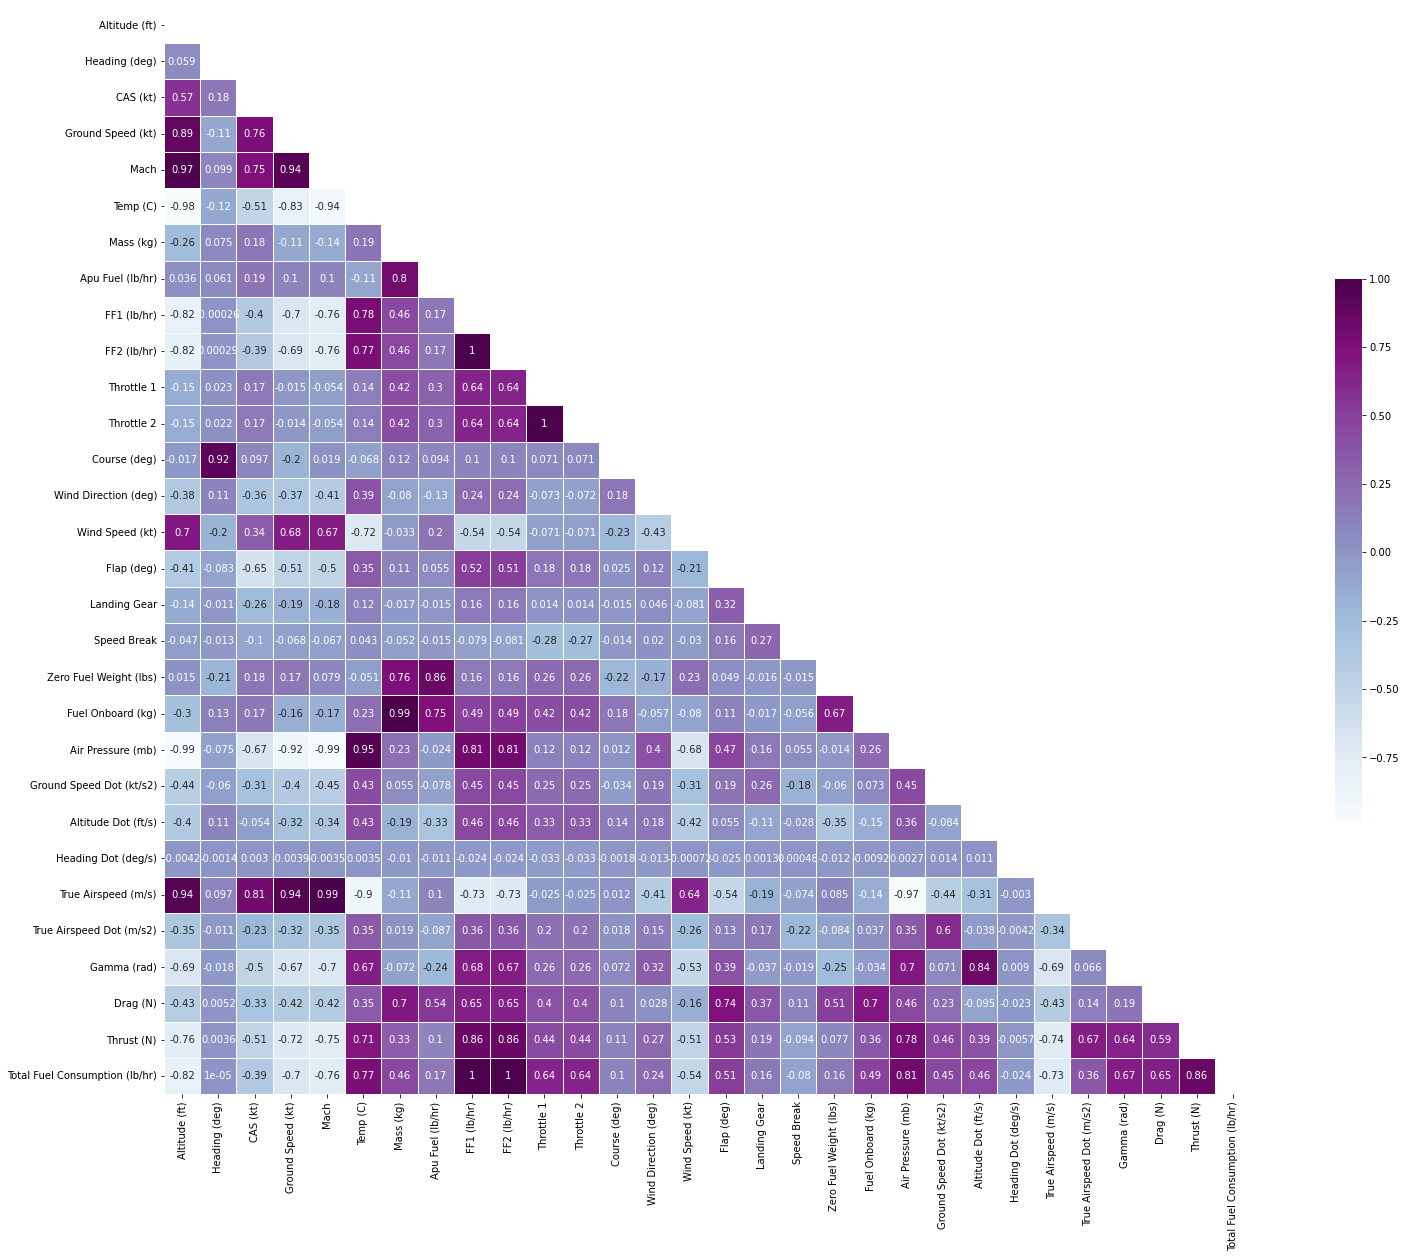

In [238]:
find_hmap(climb_data1) # create a heat map and able to see the correlation of all parameters with each other.

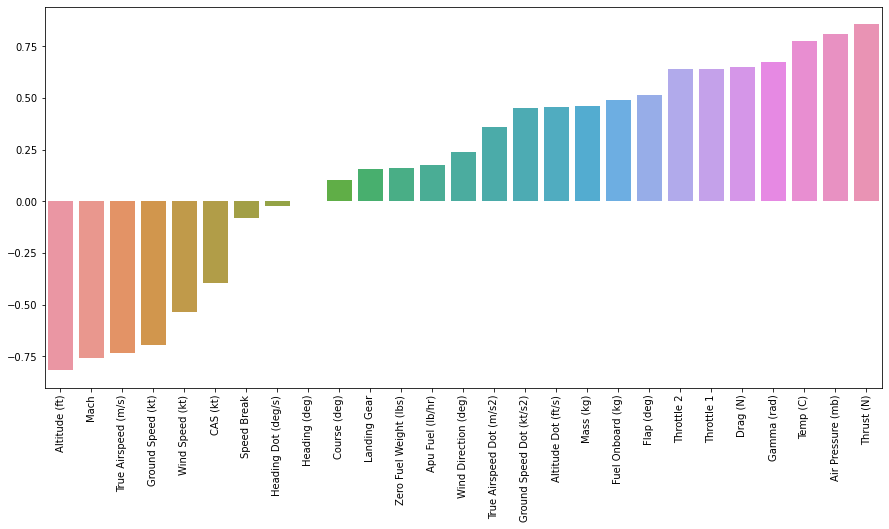

In [239]:
visual_corr(climb_data1)
# create a bar graph and able to see the correlation between "Total Fuel Consumption (lb/hr)" 
# and other features except three features: itself, "FF1 (lb/hr)" and "FF1 (lb/hr)". 

Choose 7 features that have more correlation with the specific parameter. (> 0.5 correlation value)
These features are: "Thrust (N)", "Air Pressure (mb)", "Temp (C)", "Gamma (rad)", "Drag (N)", "Throttle 1", "Throttle 2".

In [240]:
climb_fts = ["Thrust (N)", "Air Pressure (mb)", "Temp (C)", "Gamma (rad)", "Drag (N)", "Throttle 1", "Throttle 2"]

In [241]:
climb_data2 = situation("climb", dt2) # Climb flight phase dataset from dt2 dataset as a test dataset.
climb_data2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
0,0.0,0.0,0.000000,0.0,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0
1,140.0,263.0,131.630005,125.0,0.2025,18.250000,325554.625000,238.0,31984.0,32544.0,...,1008.00,3.0,0.0,0.0,69.279213,2.551095,0.000000,485283.281250,1.315804e+06,64528.0
15,149.0,263.0,179.880005,173.0,0.2720,18.250000,325440.312500,238.0,32000.0,32656.0,...,1007.00,3.0,4.0,0.0,93.056526,1.368784,0.013102,368130.187500,8.554014e+05,64656.0
16,154.0,263.0,184.000000,176.0,0.2780,18.379999,325432.125000,238.0,32000.0,32640.0,...,1006.50,2.5,7.0,0.0,95.130470,2.202849,0.022428,366832.312500,1.155287e+06,64640.0
17,163.0,263.0,186.750000,178.0,0.2850,18.000000,325423.968750,238.0,31952.0,32608.0,...,1006.00,2.5,9.5,0.0,97.462227,1.401311,0.029710,366527.937500,9.173621e+05,64560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368548,30995.0,42.0,281.630005,515.0,0.7620,-44.380001,219682.968750,241.0,8976.0,9008.0,...,287.75,0.0,6.0,0.0,230.970779,0.075778,0.007918,108795.062500,1.425001e+05,17984.0
368549,31001.0,42.0,281.880005,515.0,0.7625,-44.380001,219680.687500,241.0,8880.0,8896.0,...,287.50,0.0,5.0,0.0,231.122345,0.121203,0.006594,108829.531250,1.496610e+05,17776.0
368550,31005.0,42.0,281.880005,515.0,0.7630,-44.500000,219678.453125,241.0,8768.0,8800.0,...,287.25,0.0,4.0,0.0,231.213196,0.088271,0.005273,108866.804688,1.396179e+05,17568.0
374925,10596.0,340.0,258.130005,312.0,0.4715,7.500000,209119.968750,241.0,2064.0,2064.0,...,681.50,-1.0,8.0,0.0,158.304443,-0.485125,0.015403,102106.375000,3.224546e+04,4128.0


Using the prepared training and test datasets, let's estimate the total amount of fuel using XGBoost and Random Forest supervised machine learning algorithms.

**XGBoost** is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time. [[4]](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d) 

The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage. [[5]](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)
 
In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and these variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems. [[6]](https://www.geeksforgeeks.org/xgboost/)

![XGBoost](XGBoost.png)

In [242]:
model(climb_data1, climb_data2, climb_fts, RandomForestRegressor(n_estimators=30, max_depth=10, max_features=.3, max_samples=.7, random_state=42))
model(climb_data1, climb_data2, climb_fts,  xg.XGBRegressor(n_estimators = 30, max_depth=10))

Model: RandomForestRegressor
Mean Absolute Error: 1031.0704335517785
Mean Squared Error: 1879415.6289611538
R2 Score: 0.9808757386919584
Model: XGBRegressor
Mean Absolute Error: 868.60614
Mean Squared Error: 1773027.9
R2 Score: 0.9819583035191973


It is seen that the model built with **Random Forest Algorithm** works with 98.08% R2 score.
The difference between the estimated value and the actual value is 1031.07 according to MAE.

On the other hand, the model built with **XGBoost Algorithm** works with 98.20% R2 score.
The difference between the estimated value and the actual value is 868.61 according to MAE.

In conclusion, the model built with **XGBoost** works more efficient than the model built with **Random Forest**. Since the errors are smaller.

#### **Key Differences Between Random Forest and XGBoost** 
* *Random Forest* and *XGBoost* are decision tree algorithms where the training data is taken in a different manner. *XGBoost* trains specifically the gradient boost data and gradient boost decision trees. The training methods used by both algorithms is different. We can use *XGBoost* to train the *Random Forest* algorithm if it has high gradient data or we can use *Random Forest* algorithm to train *XGBoost* for its specific decision trees. Also, we can take samples of data if the training data is huge and if the data is very less, we can use the entire training data to know the gradient of the same.

* *XGBoost* helps in numerical optimization where the loss function of the data is minimized with the help of weak learners so that iteration happens in the local function in a differentiable manner. Sample is not modified here but different levels of importance are given to each feature in the data. *Random Forest* is mostly a bagging technique where various subsets are considered and an average of each subset is calculated. Either random subset of features or bootstrap samples of data is taken for each experiment in the data.

* Random subsamples of data are selected for *Random Forest* where the growing happens in parallel and overfitting is reduced with the combination of several underfitting features in the algorithm. Only a random subset of features is selected always that are included in the decision tree so that the result is not dependent on any subset of data. Overfitting is reduced with the help of regularization parameters in *XGBoost* that helps to select features based on weak and strong features in the decision tree. Algorithm is the combination of sequential growth by combining all the previous iterations in the decision trees. Optimal values of each leaf are calculated and hence the overall gradient of the tree is given as the output.

* Several hyperparameters are involved while calculating the result using *XGBoost*. Some include regularization rate, subsample, minimum weights, maximum depths, and learning rates. Though *XGBoost* is noted for better performance and high speed, these hyperparameters always stop developers from looking into this algorithm. Hyperparameters are not needed in *Random Forest* and developers can easily understand and visualize *Random Forest* algorithm with few parameters present in the data. [[7]](https://www.educba.com/random-forest-vs-xgboost/)


### For Descent Phase

In [243]:
descent_data1 = situation("descent", dt1) # Descent flight phase dataset from dt1 dataset as a train dataset.
descent_data1

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
10195,31013.0,72.0,298.500000,528.0,0.8205,-39.380001,306954.250000,238.0,8464.0,8384.0,...,287.00,0.0,-4.5,-0.5,251.407684,-0.264335,-0.005456,149611.156250,52049.871094,16848.0
10196,31008.0,71.0,303.380005,528.0,0.8160,-40.130001,306952.125000,238.0,8336.0,8224.0,...,287.00,0.0,-4.0,-0.5,249.627197,-0.756326,-0.004884,149443.156250,-97414.507812,16560.0
10198,31003.0,71.0,302.750000,528.0,0.8195,-39.750000,306947.968750,238.0,8160.0,8032.0,...,287.00,-0.5,-4.0,0.0,250.902359,1.124915,-0.004859,149552.156250,480215.500000,16192.0
10199,30997.0,71.0,302.500000,527.0,0.8240,-40.000000,306945.906250,238.0,8128.0,8032.0,...,287.00,-0.5,-5.5,0.0,252.144867,-0.389667,-0.006649,149832.390625,10212.876953,16160.0
38669,35009.0,125.0,286.500000,558.0,0.8425,-49.630001,243610.609375,238.0,6272.0,6272.0,...,238.50,-0.5,-3.5,0.0,252.422058,-0.856633,-0.004226,121901.484375,-96879.851562,12544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348539,81.0,55.0,146.630005,142.0,0.2190,21.129999,237908.171875,237.0,5776.0,5776.0,...,1020.75,-1.5,-10.0,0.5,75.293716,-0.749189,-0.040481,346358.718750,73673.882812,11552.0
348540,73.0,56.0,146.000000,140.0,0.2180,21.379999,237906.796875,237.0,5312.0,5376.0,...,1020.50,-2.0,-6.0,1.5,74.981758,-1.117373,-0.024390,345646.062500,22912.177734,10688.0
348541,69.0,58.0,143.380005,138.0,0.2125,21.129999,237905.500000,237.0,4992.0,5040.0,...,1020.25,-3.5,-4.0,2.0,73.058975,-2.688120,-0.016688,342660.312500,-335792.031250,10032.0
348542,65.0,60.0,137.130005,133.0,0.2025,21.000000,237904.281250,237.0,4704.0,4704.0,...,1020.00,-5.0,-4.0,0.5,69.605515,-2.234745,-0.017516,342138.312500,-230382.359375,9408.0


In [244]:
find_corr(descent_data1) # find correlation with a specific parameter, "Total Fuel Consumption (lb/hr)" feature.

Total Fuel Consumption (lb/hr)    1.000000
FF1 (lb/hr)                       0.999831
FF2 (lb/hr)                       0.999826
Throttle 2                        0.860924
Throttle 1                        0.857929
Thrust (N)                        0.729278
Drag (N)                          0.653664
Landing Gear                      0.630330
Flap (deg)                        0.626647
Altitude Dot (ft/s)               0.502311
Fuel Onboard (kg)                 0.329094
Mass (kg)                         0.307014
Air Pressure (mb)                 0.292471
Ground Speed Dot (kt/s2)          0.240190
True Airspeed Dot (m/s2)          0.206964
Gamma (rad)                       0.186226
Temp (C)                          0.151180
Zero Fuel Weight (lbs)            0.064259
Apu Fuel (lb/hr)                  0.044819
Wind Direction (deg)              0.013945
Heading Dot (deg/s)               0.000588
Wind Speed (kt)                  -0.040717
Speed Break                      -0.068028
Course (deg

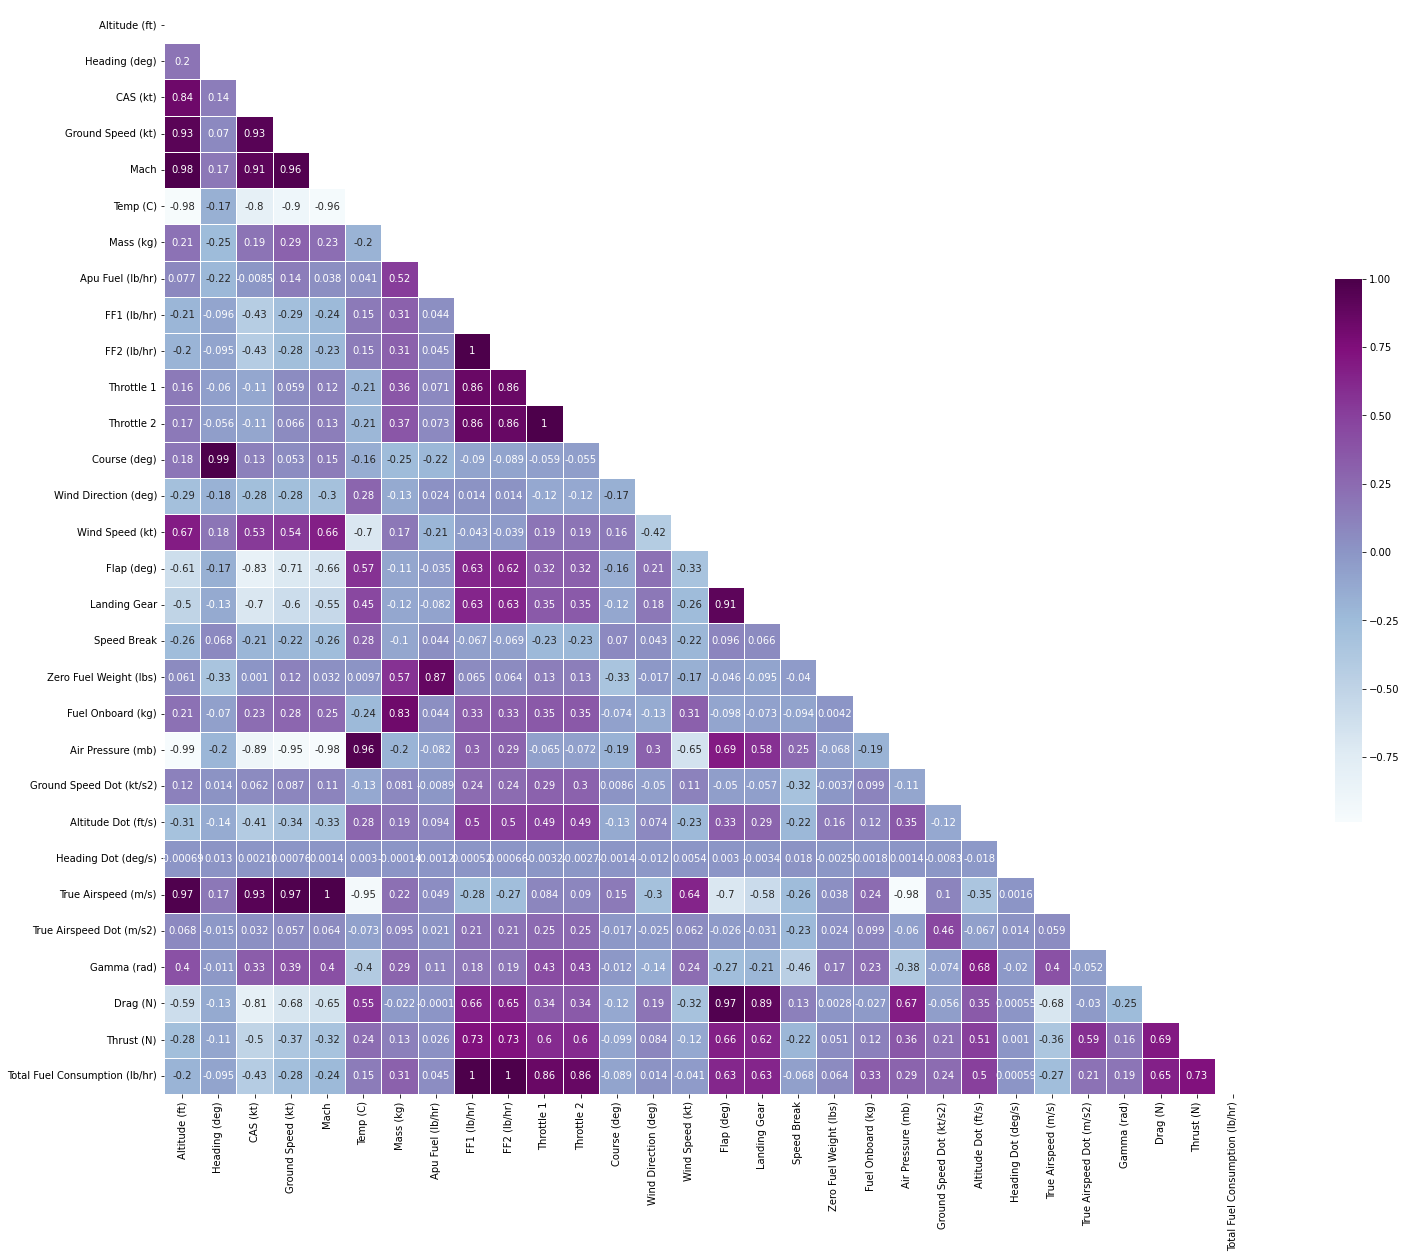

In [245]:
find_hmap(descent_data1) # create a heat map and able to see the correlation of all parameters with each other.

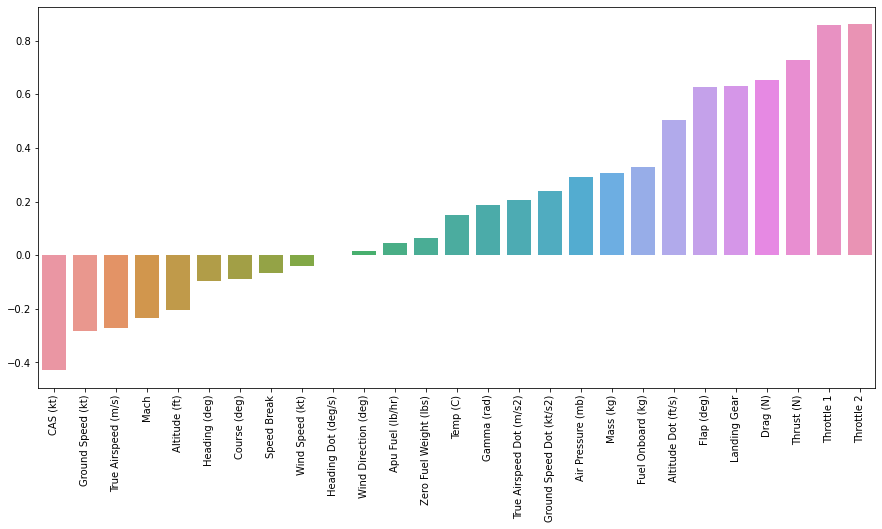

In [246]:
visual_corr(descent_data1)
# create a bar graph and able to see the correlation between "Total Fuel Consumption (lb/hr)"
# and other features except three features: itself, "FF1 (lb/hr)" and "FF1 (lb/hr)". 

Choose 6 features that have more correlation with the specific parameter.(> 0.5 correlation value)
These features are: "Throttle 2", "Throttle 1", "Thrust (N)", "Drag (N)", "Landing Gear", "Flap (deg)".

In [247]:
descent_fts = ["Throttle 2", "Throttle 1", "Thrust (N)", "Drag (N)", "Landing Gear", "Flap (deg)"]

In [248]:
descent_data2 = situation("descent", dt2) # Descent flight phase dataset from dt2 dataset as a test dataset.
descent_data2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
6634,30999.0,57.0,306.130005,510.0,0.8290,-43.750000,305544.218750,238.0,9968.0,9952.0,...,287.25,0.0,-4.5,0.0,251.625214,0.192077,-0.005451,149646.609375,192001.531250,19920.0
6635,30993.0,57.0,308.250000,510.0,0.8265,-43.880001,305541.718750,238.0,9856.0,9840.0,...,287.50,0.0,-6.0,0.0,250.795258,-0.386960,-0.007292,149330.781250,9249.130859,19696.0
6678,31001.0,57.0,302.500000,509.0,0.8180,-43.880001,305427.968750,238.0,11344.0,11392.0,...,287.00,0.0,-4.0,0.0,248.216003,1.560410,-0.004912,148677.750000,610558.437500,22736.0
6707,30992.0,57.0,304.380005,511.0,0.8195,-43.880001,305349.687500,238.0,10192.0,10224.0,...,287.50,0.0,-4.0,0.0,248.671158,-0.160015,-0.004903,148693.468750,85151.398438,20416.0
6708,30987.0,57.0,302.000000,511.0,0.8165,-43.630001,305347.093750,238.0,10144.0,10160.0,...,287.75,0.0,-3.5,0.0,247.895966,0.455164,-0.004303,148577.796875,274674.437500,20304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375372,2466.0,74.0,137.630005,151.0,0.2165,22.629999,208630.484375,241.0,6480.0,6176.0,...,929.25,-1.0,-6.5,0.0,74.623756,-0.525172,-0.026549,305447.125000,141561.609375,12656.0
375373,2460.0,74.0,137.130005,150.0,0.2150,22.500000,208628.968750,241.0,6048.0,5696.0,...,929.50,-0.5,-6.0,0.0,74.090439,-0.611266,-0.024683,304317.187500,126288.390625,11744.0
375374,2454.0,74.0,135.380005,150.0,0.2130,22.500000,208627.562500,241.0,5584.0,5312.0,...,929.75,-1.0,-5.5,0.0,73.401222,-0.516910,-0.022839,302981.781250,148413.218750,10896.0
375375,2449.0,74.0,134.250000,148.0,0.2120,22.500000,208626.265625,241.0,5152.0,4912.0,...,930.00,-1.5,-5.0,0.0,73.056618,-0.415419,-0.020861,302395.156250,173048.765625,10064.0


Using the prepared training and test datasets, let's estimate the total amount of fuel using XGBoost and Random Forest supervised machine learning algorithms.

In [249]:
model(descent_data1, descent_data2, descent_fts, RandomForestRegressor(n_estimators=30, max_depth=10, max_features=.3, max_samples=.7, random_state=42))
model(descent_data1, descent_data2, descent_fts,  xg.XGBRegressor(n_estimators = 30, max_depth=10))

Model: RandomForestRegressor
Mean Absolute Error: 766.5828943034169
Mean Squared Error: 1150892.4579327765
R2 Score: 0.9386317585885183
Model: XGBRegressor
Mean Absolute Error: 827.45215
Mean Squared Error: 1396399.9
R2 Score: 0.9255407368409659


It is seen that the model built with **Random Forest Algorithm** works with 94% R2 score.
The difference between the estimated value and the actual value is 776.58 according to MAE.

On the other hand, the model built with **XGBoost Algorithm** works with 93% R2 score.
The difference between the estimated value and the actual value is 827.45 according to MAE.

In conclusion, the model built with **Random Forest** works more efficient than the model built with **XGBoost**. Since the errors are smaller.

### For Cruise Phase

In [250]:
cruise_data1 = situation("cruise", dt1) # Cruise flight phase dataset from dt1 dataset as a train dataset.
cruise_data1

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
2,139.0,263.0,132.880005,125.0,0.2050,20.379999,337130.843750,238.0,37184.0,36192.0,...,1006.0,4.0,0.5,0.0,70.390503,2.139048,0.002165,468451.875000,1.196749e+06,73376.0
3,140.0,263.0,137.130005,129.0,0.2120,20.379999,337121.593750,238.0,37168.0,36128.0,...,1006.0,4.0,0.5,0.0,72.794083,2.309424,0.002094,441259.468750,1.226738e+06,73296.0
4,140.0,263.0,143.000000,133.0,0.2185,20.250000,337112.312500,238.0,37184.0,36144.0,...,1006.0,4.0,0.0,0.0,75.009354,1.794219,0.000000,419061.156250,1.023915e+06,73328.0
5,140.0,263.0,146.630005,137.0,0.2225,20.250000,337103.031250,238.0,37216.0,36176.0,...,1006.0,4.0,0.0,0.0,76.382523,1.888107,0.000000,406718.937500,1.043206e+06,73392.0
6,140.0,263.0,149.380005,141.0,0.2295,20.250000,337093.750000,238.0,37200.0,36192.0,...,1006.0,4.0,0.5,0.0,78.785568,2.059753,0.001934,387340.468750,1.088065e+06,73392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348315,3008.0,58.0,170.250000,163.0,0.2705,11.880000,238329.703125,237.0,8096.0,7872.0,...,917.0,0.5,0.5,0.0,91.525734,0.413138,0.001665,220528.468750,3.228832e+05,15968.0
348316,3009.0,58.0,171.000000,164.0,0.2725,11.630000,238327.687500,237.0,7968.0,7744.0,...,917.0,0.5,0.5,0.0,92.161980,0.138534,0.001654,220396.328125,2.572777e+05,15712.0
348317,3009.0,58.0,171.250000,164.0,0.2715,11.500000,238325.703125,237.0,7904.0,7680.0,...,917.0,0.0,-0.5,0.0,91.802803,0.084552,-0.001660,220451.156250,2.367222e+05,15584.0
348319,3007.0,58.0,172.000000,164.0,0.2735,11.630000,238321.734375,237.0,7760.0,7744.0,...,917.0,-0.5,-0.5,0.0,92.500191,0.000000,-0.001648,220350.531250,2.164999e+05,15504.0


In [251]:
find_corr(cruise_data1) # find correlation with a specific parameter, "Total Fuel Consumption (lb/hr)" feature.

Total Fuel Consumption (lb/hr)    1.000000
FF1 (lb/hr)                       0.999399
FF2 (lb/hr)                       0.999395
Mass (kg)                         0.901393
Fuel Onboard (kg)                 0.897005
Drag (N)                          0.895347
Throttle 2                        0.767251
Throttle 1                        0.766868
CAS (kt)                          0.741331
Air Pressure (mb)                 0.408861
Thrust (N)                        0.392237
Apu Fuel (lb/hr)                  0.338892
Temp (C)                          0.320631
Zero Fuel Weight (lbs)            0.285547
Course (deg)                      0.204748
True Airspeed (m/s)               0.189287
Heading (deg)                     0.187097
Ground Speed Dot (kt/s2)          0.179225
Landing Gear                      0.126859
True Airspeed Dot (m/s2)          0.086400
Wind Speed (kt)                   0.075437
Mach                              0.054418
Ground Speed (kt)                 0.041449
Flap (deg) 

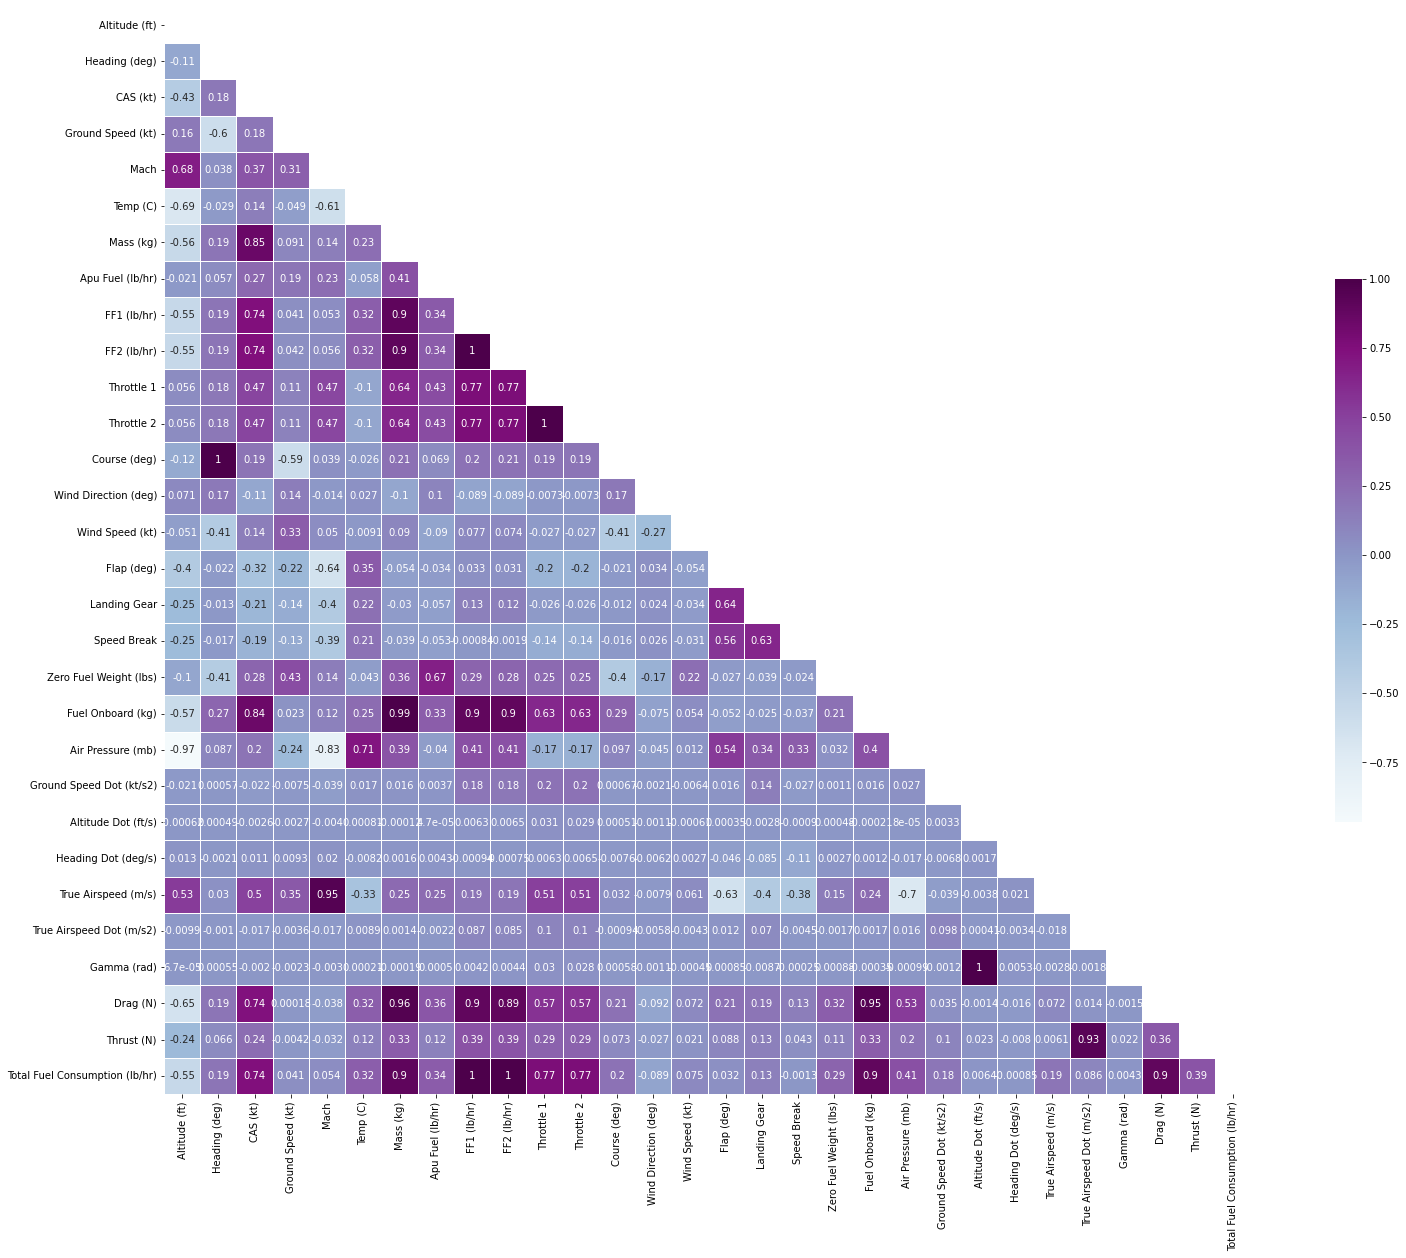

In [252]:
find_hmap(cruise_data1) # create a heat map and able to see the correlation of all parameters with each other.

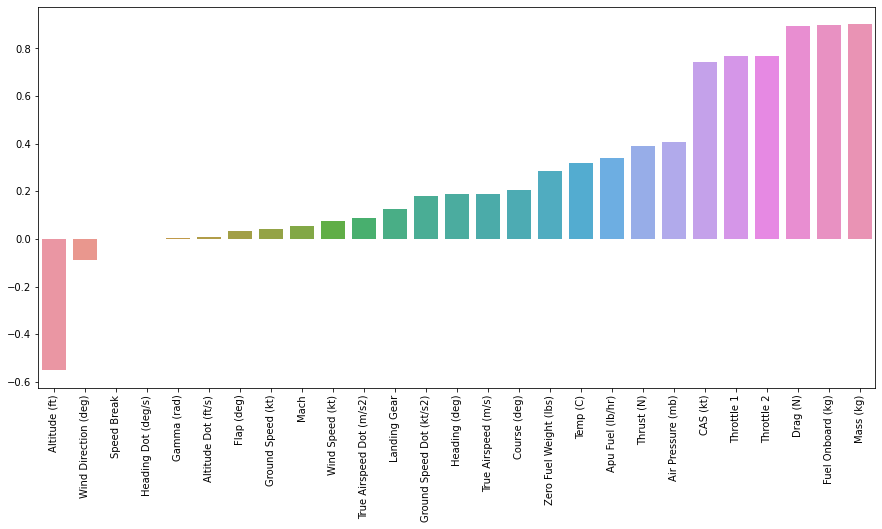

In [253]:
visual_corr(cruise_data1)
# create a bar graph and able to see the correlation between "Total Fuel Consumption (lb/hr)"
# and other features except three features: itself, "FF1 (lb/hr)" and "FF1 (lb/hr)". 

Choose 6 features that have more correlation with the specific parameter.(> 0.5 correlation value)
These features are: "Mass (kg)", "Fuel Onboard (kg)", "Drag (N)", "Throttle 2", "Throttle 1", "CAS (kt)".

In [254]:
cruise_fts = ["Mass (kg)", "Fuel Onboard (kg)", "Drag (N)", "Throttle 2", "Throttle 1", "CAS (kt)"]

In [255]:
cruise_data2 = situation("cruise", dt2) # Cruise flight phase dataset from dt2 dataset as a test dataset.
cruise_data2

,Altitude (ft),Heading (deg),CAS (kt),Ground Speed (kt),Mach,Temp (C),Mass (kg),Apu Fuel (lb/hr),FF1 (lb/hr),FF2 (lb/hr),...,Air Pressure (mb),Ground Speed Dot (kt/s2),Altitude Dot (ft/s),Heading Dot (deg/s),True Airspeed (m/s),True Airspeed Dot (m/s2),Gamma (rad),Drag (N),Thrust (N),Total Fuel Consumption (lb/hr)
2,140.0,263.0,136.630005,128.0,0.2100,18.129999,325546.437500,238.0,31968.0,32576.0,...,1008.0,3.5,0.0,0.0,71.830307,2.301695,0.000000,460186.375000,1.209495e+06,64544.0
3,140.0,263.0,140.880005,132.0,0.2160,18.129999,325538.281250,238.0,31952.0,32528.0,...,1008.0,4.0,0.0,0.0,73.882607,1.033760,0.000000,442943.000000,7.794714e+05,64480.0
4,140.0,263.0,142.380005,136.0,0.2160,18.250000,325530.125000,238.0,31984.0,32512.0,...,1008.0,3.5,0.0,0.0,73.897827,1.539221,0.000000,442924.656250,9.439874e+05,64496.0
5,140.0,263.0,147.500000,139.0,0.2250,18.129999,325522.000000,238.0,32000.0,32416.0,...,1008.0,3.5,0.5,0.0,76.961044,2.643268,0.001980,421236.625000,1.288000e+06,64416.0
7,142.0,263.0,155.380005,147.0,0.2365,18.129999,325505.687500,238.0,31984.0,32496.0,...,1008.0,3.5,0.5,0.0,80.894608,1.444543,0.001884,399846.250000,8.760671e+05,64480.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374244,31001.0,41.0,279.880005,468.0,0.7575,-37.500000,209527.593750,241.0,7008.0,7008.0,...,287.0,0.0,0.0,0.0,233.036026,-0.109098,0.000000,104778.757812,8.191977e+04,14016.0
374245,31001.0,41.0,279.500000,468.0,0.7575,-37.380001,209525.984375,241.0,6336.0,6192.0,...,287.0,0.0,-0.5,0.0,233.095383,-0.032164,-0.000654,104778.203125,9.669552e+04,12528.0
374246,31000.0,41.0,280.000000,468.0,0.7575,-37.630001,209524.406250,241.0,6192.0,6112.0,...,287.0,0.0,-0.5,0.0,232.971695,-0.029682,-0.000654,104779.148438,9.721586e+04,12304.0
374247,31000.0,41.0,280.130005,468.0,0.7575,-37.500000,209522.843750,241.0,6112.0,6064.0,...,287.0,0.0,-0.5,0.0,233.036026,-0.015082,-0.000654,104778.609375,1.002748e+05,12176.0


Using the prepared training and test datasets, let's estimate the total amount of fuel using XGBoost and Random Forest supervised machine learning algorithms.

In [256]:
model(cruise_data1, cruise_data2, cruise_fts, RandomForestRegressor(n_estimators=30, max_depth=10, max_features=.3, max_samples=.7, random_state=42))
model(cruise_data1, cruise_data2, cruise_fts,  xg.XGBRegressor(n_estimators = 30, max_depth=10))

Model: RandomForestRegressor
Mean Absolute Error: 410.46465081012525
Mean Squared Error: 301207.9416010322
R2 Score: 0.925856934697173
Model: XGBRegressor
Mean Absolute Error: 441.39554
Mean Squared Error: 388052.3
R2 Score: 0.9044799840371646


It is seen that the model built with **Random Forest Algorithm** works with 93% R2 score.
The difference between the estimated value and the actual value is 410.46 according to MAE.

On the other hand, the model built with **XGBoost Algorithm** works with 90% R2 score.
The difference between the estimated value and the actual value is 441.40 according to MAE.

In conclusion, the model built with **Random Forest** works more efficient than the model built with **XGBoost**. Since the errors are smaller.